<a href="https://colab.research.google.com/github/jiobu1/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Jisha_Obukwelu_DSPT5_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- [x] Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
-[x] Convert the `term` column from string to integer.
-  [x] Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
-  [x] Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- [x] There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- [x] Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- [x] Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

##Lending Club Data

###Making Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Loading dataset

In [1]:
#Retrieving data
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-01-16 02:43:00--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [        <=>         ]  21.72M  1.83MB/s    in 12s     

2020-01-16 02:43:12 (1.80 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22776791]



In [2]:
#Unzipping data
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [123]:
#Loading a cleaner copy of the data
#Addressing header with the 'skiprows' parameter
#Deleting footer 

loan = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')
print(loan.shape)
loan.head()

(128397, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,...,100.0,0,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0
1,NaN,NaN,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,...,16.7,0,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,...,50.0,0,0,89849,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,...,20.0,0,0,271550,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,...,25.0,0,0,253539,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


###Data Exploration

In [124]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,...,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,128397.000000,128397.000000,128397.000000,128397.000000,1.283970e+05,0.0,0.0,128160.000000,128397.000000,128397.000000,56207.000000,15447.000000,128397.000000,128397.000000,1.283970e+05,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,29174.000000,128397.0,1.677800e+04,16778.000000,128397.0,128397.000000,1.283970e+05,128397.000000,128397.000000,128397.000000,128397.000000,...,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,128397.000000,125538.0,128397.0,128397.000000,128397.000000,128397.000000,126705.000000,128397.000000,128397.0,1.283970e+05,1.283970e+05,128397.000000,1.283970e+05,1.677800e+04,16778.000000,16778.000000,16778.000000,16520.000000,16778.000000,16778.000000,16778.000000,16778.000000,5152.000000,233.0,233.000000,233.0,233.000000,206.000000,233.000000,233.000000,451.000000,451.000000,451.000000
mean,NaN,NaN,15971.190332,15971.190332,15968.367147,463.248186,8.279682e+04,NaN,NaN,19.932898,0.227848,0.447035,36.879125,86.128957,11.564086,0.121841,1.689701e+04,22.677290,9530.315113,9528.904505,7596.640685,7595.021767,5805.215009,1765.306966,0.948546,25.170160,4.530629,2273.515983,0.017960,46.553369,1.0,1.335526e+05,19.225694,0.0,188.311199,1.467931e+05,0.939500,2.760181,0.689066,1.572552,...,5.414122,4.882170,7.065998,8.288262,8.199280,12.866835,5.386333,11.546750,0.0,0.0,0.059487,2.011675,94.659779,32.900216,0.121724,0.0,1.884858e+05,5.356007e+04,27439.454668,4.682151e+04,3.664349e+04,0.585946,1.587376,11.436762,55.880363,3.026821,12.425676,0.036178,0.062940,38.526592,3.0,201.703519,3.0,14.669528,607.108398,15659.828970,246.913004,7320.037317,51.851907,18.607539
std,NaN,NaN,10150.393855,10150.393855,10152.178762,285.726782,1.083035e+05,NaN,NaN,20.144436,0.733826,0.734429,21.813800,21.881192,5.981786,0.332815,2.408124e+04,12.129592,8723.959920,8724.307663,6603.469937,6603.859767,6208.300062,1483.761653,8.574509,324.692122,58.444582,5516.758598,0.146578,21.802446,0.0,9.687744e+04,8.141831,0.0,1569.377209,1.738797e+05,1.145285,2.942505,0.935777,1.565051,...,3.439678,3.205393,4.517310,7.389264,4.959021,7.874109,3.388408,5.977787,0.0,0.0,0.410667,1.880590,8.989562,34.899797,0.332542,0.0,1.965605e+05,5.599499e+04,26376.998989,4.957639e+04,3.252675e+04,0.936073,1.801935,6.690367,26.071795,3.253894,8.190168,0.347767,0.364053,23.657781,0.0,141.270219,0.0,7.821708,425.278054,9182.493729,235.871016,5027.461162,8.713731,6.838053
min,NaN,NaN,1000.000000,1000.000000,725.000000,30.480000,0.000000e+00,NaN,NaN,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.0

In [125]:
loan.describe(exclude='number').T

,count,unique,top,freq
term,128397,2,36 months,88171
int_rate,128397,46,13.56%,6972
grade,128397,7,A,38007
sub_grade,128397,35,A4,9769
emp_title,107455,43889,Teacher,2090
emp_length,116696,11,10+ years,38821
home_ownership,128397,4,MORTGAGE,63481
verification_status,128397,3,Not Verified,58346
issue_d,128397,3,Oct-2018,46299
loan_status,128397,7,Current,97694


In [126]:
pd.set_option('display.max_rows', 200)
loan.isnull().sum().sort_values(ascending=False)

id                                            128397
desc                                          128397
member_id                                     128397
url                                           128397
orig_projected_additional_accrued_interest    128191
hardship_type                                 128164
hardship_last_payment_amount                  128164
hardship_payoff_balance_amount                128164
hardship_reason                               128164
hardship_loan_status                          128164
hardship_dpd                                  128164
hardship_length                               128164
payment_plan_start_date                       128164
hardship_end_date                             128164
hardship_start_date                           128164
hardship_amount                               128164
deferral_term                                 128164
hardship_status                               128164
settlement_percentage                         

###Data Cleaning

***Dropping the 100% blank columns***


In [0]:
loan = loan.drop(['url', 'member_id', 'desc', 'id'], axis=1)

In [128]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,100.0,0,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,16.7,0,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,50.0,0,0,89849,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,20.0,0,0,271550,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,25.0,0,0,253539,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
loan.shape

(128397, 140)

***Cleaning the int_rate column***


In [0]:
def int_rate_to_float(cell_contents):
  return float(cell_contents.strip().strip('%'))

In [131]:
loan['int_rate_to_float'] = loan['int_rate'].apply(int_rate_to_float)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_to_float
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,0,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,14.47
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,0,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,10.33
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,0,0,89849,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,15.02
3,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,0,0,271550,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98
4,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,0,0,253539,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14


###Making Features

Converting the string format of issue_d to datetime

In [134]:
loan['issue_d'] = pd.to_datetime(loan['issue_d'], infer_datetime_format=True)
loan['issue_d'].head(5)

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_d, dtype: datetime64[ns]

In [0]:
loan['issue_year'] = loan['issue_d'].dt.year
loan['issue_month'] = loan['issue_d'].dt.month

In [136]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_to_float,issue_year,issue_month
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,2018-12-01,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,14.47,2018,12
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,10.33,2018,12
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,89849,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,15.02,2018,12
3,8000,8000,8000.0,36 months,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,271550,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,2018,12
4,22400,22400,22400.0,60 months,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,253539,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,2018,12


***Convert term column from string to integer***

In [0]:
#TRYING A NEW FORMULA TO CHANGE TERM COLUMN FROM STRING TO INT
convert_str_to_int = lambda x:int(x[:-7])

In [138]:
loan['term'] = loan['term'].apply(convert_str_to_int)
loan['term'].head(5)

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

***Loan_status_is_great***

In [139]:
#Define Loan_status_is_great
loan['loan_status_is_great'] = loan['loan_status'].str.contains('Current', 'Fully Paid')
loan['loan_status_is_great'].head()

0    False
1     True
2    False
3     True
4     True
Name: loan_status_is_great, dtype: bool

In [140]:
#Convert T/F to 0 and 1
loan['loan_status_is_great'] = loan['loan_status_is_great']*1
loan['loan_status_is_great'].head()

0    0
1    1
2    0
3    1
4    1
Name: loan_status_is_great, dtype: int64

In [141]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_to_float,issue_year,issue_month,loan_status_is_great
0,6000,6000,6000.0,36,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,2018-12-01,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,14.47,2018,12,0
1,24000,24000,24000.0,36,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,10.33,2018,12,1
2,30000,30000,30000.0,36,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,51370,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,15.02,2018,12,0
3,8000,8000,8000.0,36,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,25150,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,2018,12,1
4,22400,22400,22400.0,60,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,32070,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,2018,12,1


***Make last_pymnt_d_month and last_pymnt_d_year columns***





Months

In [142]:
#The months would be the same since loan terms are between 3 and 5 years
loan['last_pymnt_d_month'] = loan['issue_d'].dt.month
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_to_float,issue_year,issue_month,loan_status_is_great,last_pymnt_d_month
0,6000,6000,6000.0,36,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,2018-12-01,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,14.47,2018,12,0,12
1,24000,24000,24000.0,36,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,10.33,2018,12,1,12
2,30000,30000,30000.0,36,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,41600,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,15.02,2018,12,0,12
3,8000,8000,8000.0,36,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,34300,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,2018,12,1,12
4,22400,22400,22400.0,60,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,28200,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,2018,12,1,12


Years

In [143]:
#Finding out how many 3 and 5 year loans there are
loan['term'].value_counts()

36    88171
60    40226
Name: term, dtype: int64

In [144]:
#Have to add either 3 or 5 to the loan year
loan['last_pymnt_d_year'] = loan['term']/12 + loan['issue_d'].dt.year
loan['last_pymnt_d_year'] = loan['last_pymnt_d_year'].astype(int)
loan['last_pymnt_d_year'].head(5)

0    2021
1    2021
2    2021
3    2021
4    2023
Name: last_pymnt_d_year, dtype: int64

In [145]:
#Checking that I added correctly
loan['last_pymnt_d_year'].value_counts()

2021    88171
2023    40226
Name: last_pymnt_d_year, dtype: int64

In [147]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_to_float,issue_year,issue_month,loan_status_is_great,last_pymnt_d_month,last_pymnt_d_year
0,6000,6000,6000.0,36,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,2018-12-01,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,14.47,2018,12,0,12,2021
1,24000,24000,24000.0,36,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,10.33,2018,12,1,12,2021
2,30000,30000,30000.0,36,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,36249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,15.02,2018,12,0,12,2021
3,8000,8000,8000.0,36,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,Mar-2009,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,14000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,2018,12,1,12,2021
4,22400,22400,22400.0,60,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,Dec-2004,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,23364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,2018,12,1,12,2023


***days_from_earliest_credit_to_issue***

In [148]:
loan['earliest_cr_line'].head()

0    Jun-2006
1    Oct-1996
2    May-2007
3    Mar-2009
4    Dec-2004
Name: earliest_cr_line, dtype: object

In [0]:
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], infer_datetime_format=True)

In [0]:
loan['days_from_earliest_credit_to_issue'] = (loan['issue_d'] - loan['earliest_cr_line']).dt.days

In [151]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_to_float,issue_year,issue_month,loan_status_is_great,last_pymnt_d_month,last_pymnt_d_year,days_from_earliest_credit_to_issue
0,6000,6000,6000.0,36,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,2018-12-01,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,2006-06-01,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,14.47,2018,12,0,12,2021,4566
1,24000,24000,24000.0,36,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,1996-10-01,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,10.33,2018,12,1,12,2021,8096
2,30000,30000,30000.0,36,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,2007-05-01,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,15.02,2018,12,0,12,2021,4232
3,8000,8000,8000.0,36,12.98%,269.48,B,B5,Controller,4 years,MORTGAGE,95000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,480xx,MI,9.44,0,2009-03-01,2,73.0,NaN,7,0,11434,33.3%,20,w,1707.34,1707.34,6855.630000,6855.63,6292.66,562.97,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,12.98,2018,12,1,12,2021,3562
4,22400,22400,22400.0,60,16.14%,546.40,C,C4,Paramedic/ Fire Fighter,10+ years,OWN,56000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,234xx,VA,18.47,0,2004-12-01,0,75.0,NaN,15,0,13555,38.2%,22,w,19230.91,19230.91,6526.670000,6526.67,3169.09,3357.58,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,2018,12,1,12,2023,5113


#***STRETCH***

###Still Data Cleaning

***Dropping hardship columns***
- most are NaNs

In [152]:
#Using list comprehension to find harship columns
hardship_cols = [col for col in loan.columns if col.startswith('hardship_')]
hardship_cols

['hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount']

In [0]:
#Dropping hardship columns
loan = loan.drop(columns = hardship_cols)

In [154]:
#Making sure these columns got dropped
loan.shape

(128397, 135)

***Cleaning emp_title***

Look at top 20 titles

In [155]:
loan['emp_title'].value_counts(dropna=False).head(20)

NaN                   20942
Teacher                2090
Manager                1773
Registered Nurse        951
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [156]:
loan['emp_title'].nunique()

43889

Clean the title and handling the missing values

In [0]:
def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return 'unknown'

In [0]:
loan['emp_title'] = loan['emp_title'].apply(clean_title)

Combine like job titles

In [0]:
loan['emp_title'] = loan['emp_title'].replace('Registered Nurse', 'Nurse')
loan['emp_title'] = loan['emp_title'].replace('Rn', 'Nurse')

In [160]:
loan['emp_title'].value_counts(dropna=False).head(20)

unknown                     20942
Nurse                        2675
Teacher                      2557
Manager                      2395
Driver                       1258
Supervisor                   1160
Truck Driver                  920
Office Manager                804
Sales                         803
General Manager               791
Project Manager               720
Owner                         625
Director                      523
Operations Manager            518
Sales Manager                 500
Police Officer                440
Technician                    420
Engineer                      412
Administrative Assistant      409
Store Manager                 398
Name: emp_title, dtype: int64

In [161]:
#Trying not to manually type a list
top_20 = loan['emp_title'].value_counts()[1:21].index.tolist()
top_20

['Nurse',
 'Teacher',
 'Manager',
 'Driver',
 'Supervisor',
 'Truck Driver',
 'Office Manager',
 'Sales',
 'General Manager',
 'Project Manager',
 'Owner',
 'Director',
 'Operations Manager',
 'Sales Manager',
 'Police Officer',
 'Technician',
 'Engineer',
 'Administrative Assistant',
 'Store Manager',
 'Mechanic']

In [0]:
def change_to_other(x):
  if x in top_20:
    return x
  else:
    return 'Other'

In [163]:
loan['emp_title'] = loan['emp_title'].apply(change_to_other)
loan['emp_title'].value_counts()

Other                       109678
Nurse                         2675
Teacher                       2557
Manager                       2395
Driver                        1258
Supervisor                    1160
Truck Driver                   920
Office Manager                 804
Sales                          803
General Manager                791
Project Manager                720
Owner                          625
Director                       523
Operations Manager             518
Sales Manager                  500
Police Officer                 440
Technician                     420
Engineer                       412
Administrative Assistant       409
Store Manager                  398
Mechanic                       391
Name: emp_title, dtype: int64

***Cleaning the revol_util column***


In [164]:
loan['revol_util'] = loan['revol_util'].str.replace("%", " ")
loan['revol_util'].head(5)

0    91.2 
1    27.7 
2      48 
3    33.3 
4    38.2 
Name: revol_util, dtype: object

#Exploratory Visuals

In [165]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'int_rate_to_float', 'issue_year', 'issue_month',
       'loan_status_is_great', 'last_pymnt_d_month', 'last_pymnt_d_year',
       'days_from_earliest_credit_to_issue'],
      dtype='object', length=135)

In [166]:
pd.crosstab(loan['grade'], loan['emp_title'])

emp_title,Administrative Assistant,Director,Driver,Engineer,General Manager,Manager,Mechanic,Nurse,Office Manager,Operations Manager,Other,Owner,Police Officer,Project Manager,Sales,Sales Manager,Store Manager,Supervisor,Teacher,Technician,Truck Driver
grade,,,,,,,,,,,,,,,,,,,,,
A,107,168,330,159,253,687,102,876,267,162,32533,122,110,264,214,144,106,265,817,121,200
B,115,155,354,110,198,681,107,747,212,139,30634,162,133,199,250,137,109,318,705,121,271
C,99,114,320,72,177,589,105,572,196,118,26501,175,127,147,198,140,104,321,599,93,249
D,57,66,186,56,121,315,65,344,93,73,14491,127,47,76,109,62,49,191,329,63,150
E,30,19,63,14,37,112,10,131,33,26,5093,37,22,30,31,16,29,60,104,19,43
F,1,1,5,0,5,7,2,3,3,0,339,2,1,3,0,0,1,5,2,2,5
G,0,0,0,1,0,4,0,2,0,0,87,0,0,1,1,1,0,0,1,1,2


In [0]:
grade_vs_title = pd.crosstab(loan['grade'], loan['emp_title'])

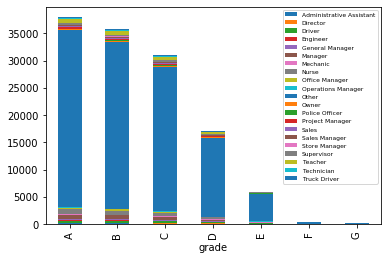

In [211]:
%matplotlib inline

grade_vs_title.plot.bar(stacked=True)
plt.legend(loc='upper right', prop={'size': 6})
plt.show();


#Instacart Data

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01